In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import nltk
import collections
import re
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import spatial
from collections import Counter

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP_Projekt/IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


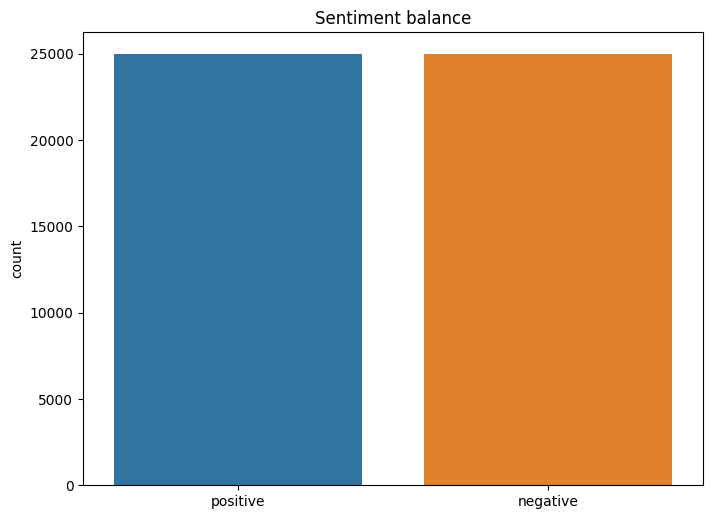

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(x=np.asarray(df.iloc[:,1]))
plt.title("Sentiment balance")
plt.show()

In [ ]:
X = np.asarray(df.iloc[:,0])
y = np.asarray(df.iloc[:,1])
y[y=="positive"] = 1
y[y=="negative"] = 0
y = y.reshape(-1,1).astype('float32')

In [ ]:
y_positive_idx = np.where(y.flatten()==1)
y_negative_idx = np.where(y.flatten()==0)

In [ ]:
X_cleaned = []
for review in X:
    clean_review = review.lower().replace("<br />", "").replace("-", " ").replace(".", " ").replace(",", " ")
    X_cleaned.append(clean_review)
X_cleaned = np.array(X_cleaned)

In [ ]:
word_count = []
for review in X_cleaned:
    split = review.replace(".", " ").replace(",", " ").replace(";", " ").replace("-", " ").split(" ")
    split = ' '.join(split).split()
    word_count.append(len(split))
word_count = np.array(word_count)

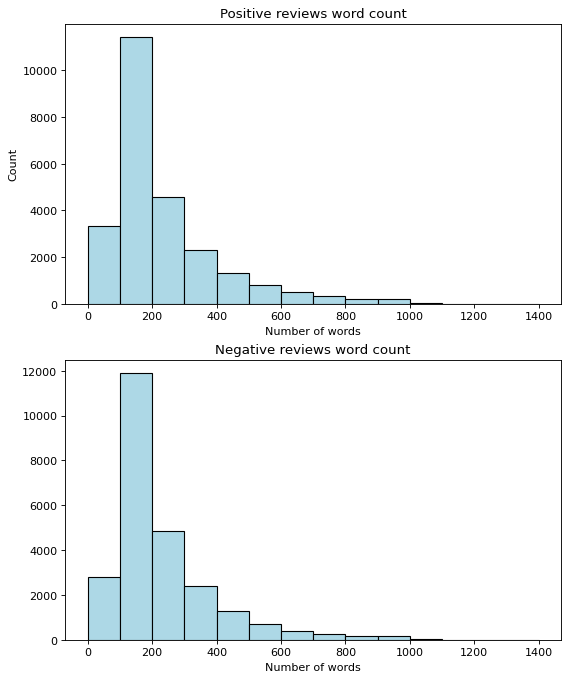

In [ ]:
plt.figure(figsize=(8,10), dpi=80)

plt.subplot(2, 1, 1)
plt.hist(word_count[y_positive_idx], color="lightblue", edgecolor='black', bins=[i*100 for i in range(15)])
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.title("Positive reviews word count")


plt.subplot(2, 1, 2)
plt.hist(word_count[y_negative_idx], color="lightblue", edgecolor='black', bins=[i*100 for i in range(15)])
plt.xlabel("Number of words")
plt.title("Negative reviews word count")

plt.savefig("word_count.PNG")

plt.show()

In [ ]:
STOPWORDS = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
words = ' '.join(list(X_cleaned))

In [ ]:
split_it = words.split()
Counter_all = Counter(split_it)

In [ ]:
most_common_words = []
most_common_words_occ = []
for row in Counter_all.most_common(100):
    if row[0] not in STOPWORDS:
        most_common_words.append(row[0])
        most_common_words_occ.append(row[1])

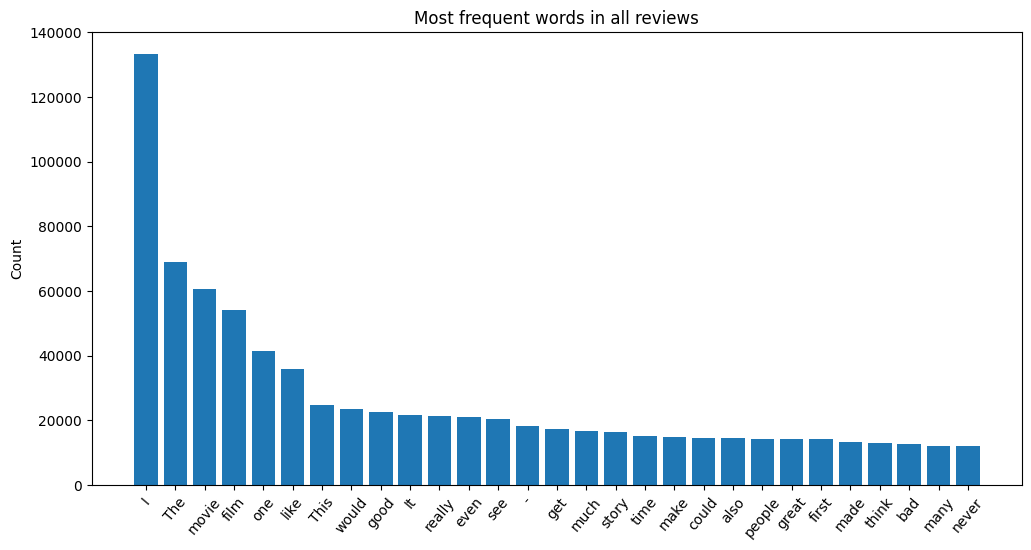

In [ ]:
plt.figure(figsize=(12,6), dpi=100)
plt.bar(range(len(most_common_words)), most_common_words_occ, align='center')
plt.xticks(range(len(most_common_words)), most_common_words, rotation = 50)
plt.title("Most frequent words in all reviews")
plt.ylabel("Count")
plt.savefig("EDA")
plt.show()

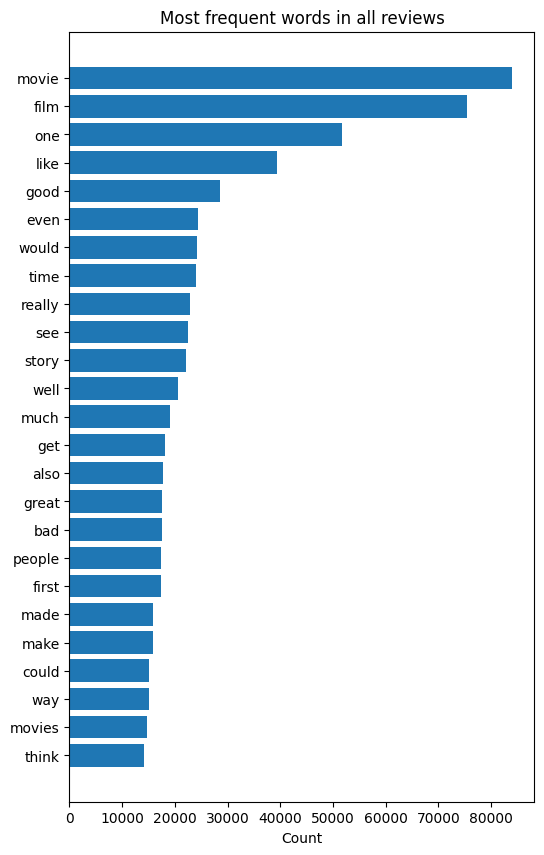

In [ ]:
plt.rcdefaults()
plt.figure(figsize=(6,10), dpi=100)
plt.barh(np.arange(len(most_common_words_occ)), most_common_words_occ, align='center')
plt.yticks(np.arange(len(most_common_words_occ)), most_common_words)
plt.gca().invert_yaxis()
plt.xlabel("Count")
plt.title("Most frequent words in all reviews")
plt.savefig("EDA_all.PNG")
plt.show()

In [ ]:
np.arange(len(most_common_words_occ))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [ ]:
positive_words = ' '.join(list(X_cleaned[y_positive_idx]))

In [ ]:
split_it_p = positive_words.split()
Counter_p = Counter(split_it_p)

In [ ]:
most_common_words_p = []
most_common_words_occ_p = []
for row in Counter_p.most_common(100):
    if row[0] not in STOPWORDS:
        most_common_words_p.append(row[0])
        most_common_words_occ_p.append(row[1])

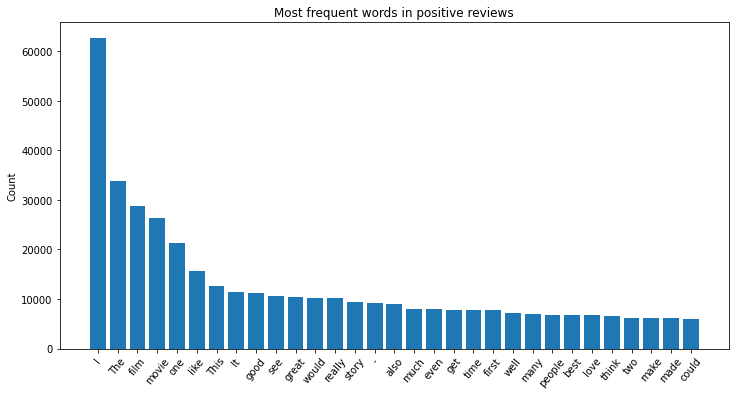

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(range(len(most_common_words_p)), most_common_words_occ_p, align='center')
plt.xticks(range(len(most_common_words_p)), most_common_words_p, rotation = 50)
plt.title("Most frequent words in positive reviews")
plt.ylabel("Count")
plt.show()

In [ ]:
negative_words = ' '.join(list(X_cleaned[y_negative_idx]))
split_it_n = negative_words.split()
Counter_n = Counter(split_it_n)
most_common_words_n = []
most_common_words_occ_n = []
for row in Counter_n.most_common(100):
    if row[0] not in STOPWORDS:
        most_common_words_n.append(row[0])
        most_common_words_occ_n.append(row[1])

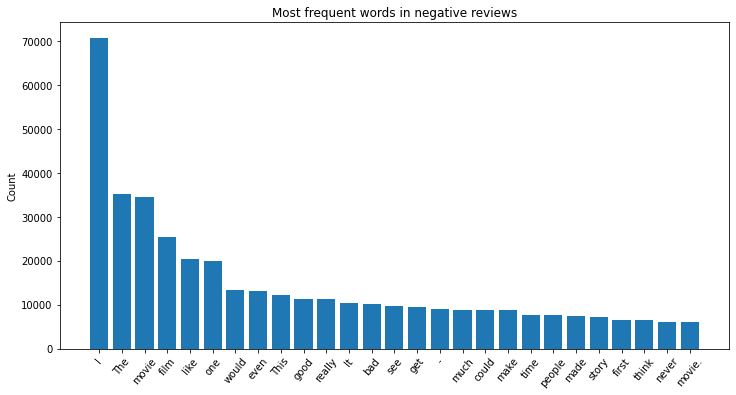

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(range(len(most_common_words_n)), most_common_words_occ_n, align='center')
plt.xticks(range(len(most_common_words_n)), most_common_words_n, rotation = 50)
plt.title("Most frequent words in negative reviews")
plt.ylabel("Count")
plt.show()

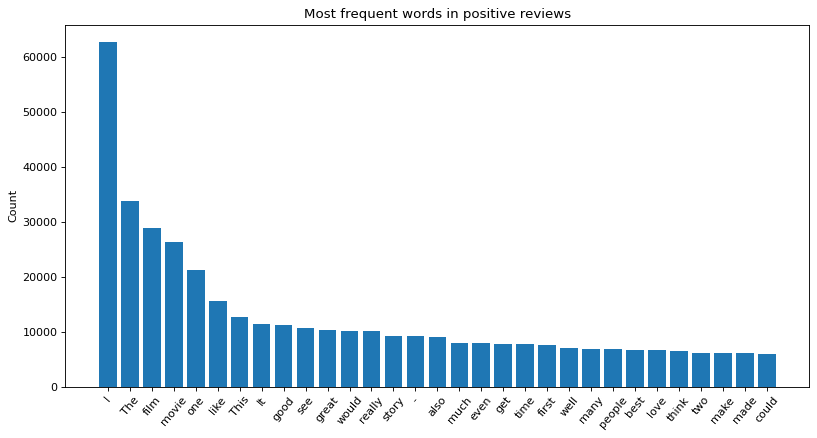

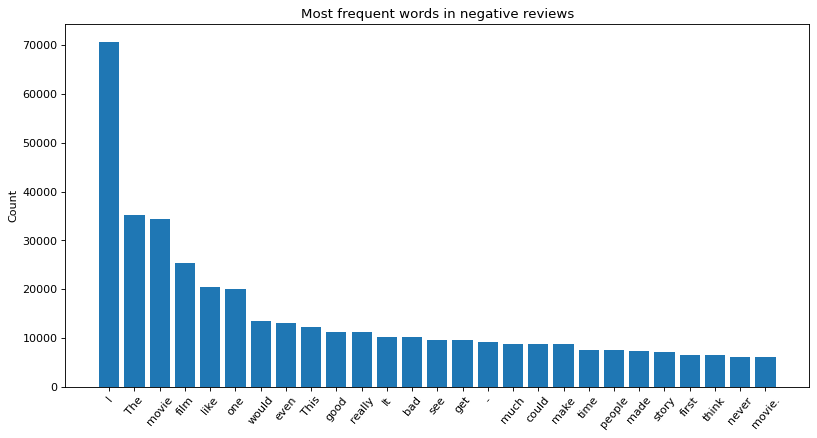

In [ ]:
plt.figure(figsize=(12,6), dpi=80)
plt.bar(range(len(most_common_words_p)), most_common_words_occ_p, align='center')
plt.xticks(range(len(most_common_words_p)), most_common_words_p, rotation = 50)
plt.title("Most frequent words in positive reviews")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12,6), dpi=80)
plt.bar(range(len(most_common_words_n)), most_common_words_occ_n, align='center')
plt.xticks(range(len(most_common_words_n)), most_common_words_n, rotation = 50)
plt.title("Most frequent words in negative reviews")
plt.ylabel("Count")
plt.show()

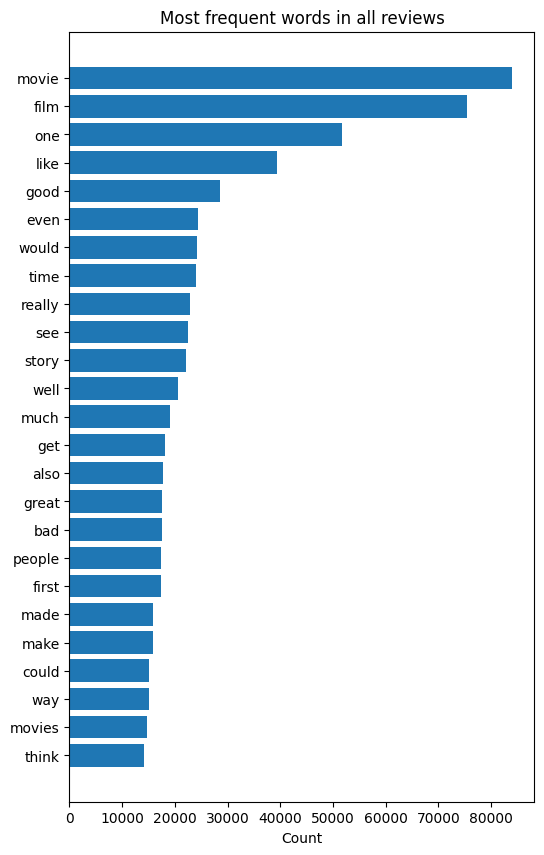

In [ ]:
plt.rcdefaults()
plt.figure(figsize=(6,10), dpi=100)
plt.barh(np.arange(len(most_common_words_occ)), most_common_words_occ, align='center')
plt.yticks(np.arange(len(most_common_words_occ)), most_common_words)
plt.gca().invert_yaxis()
plt.xlabel("Count")
plt.title("Most frequent words in all reviews")

plt.show()

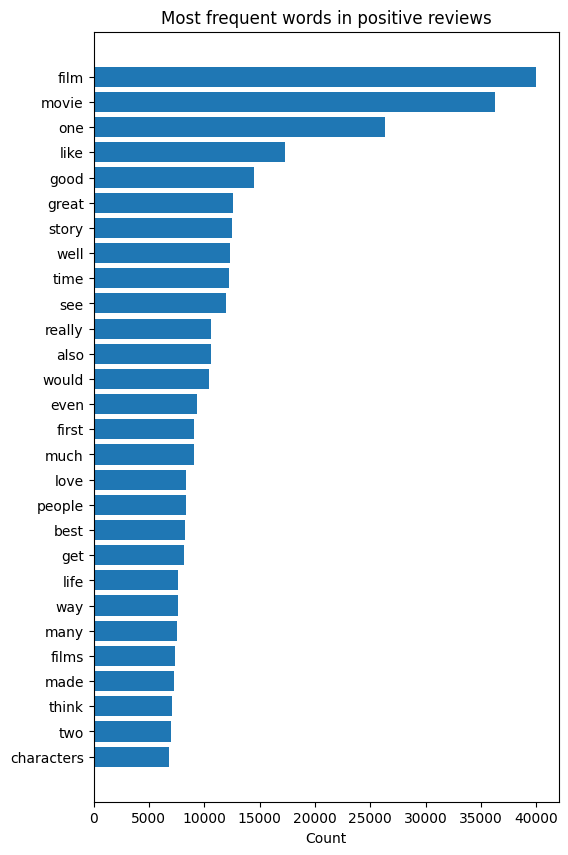

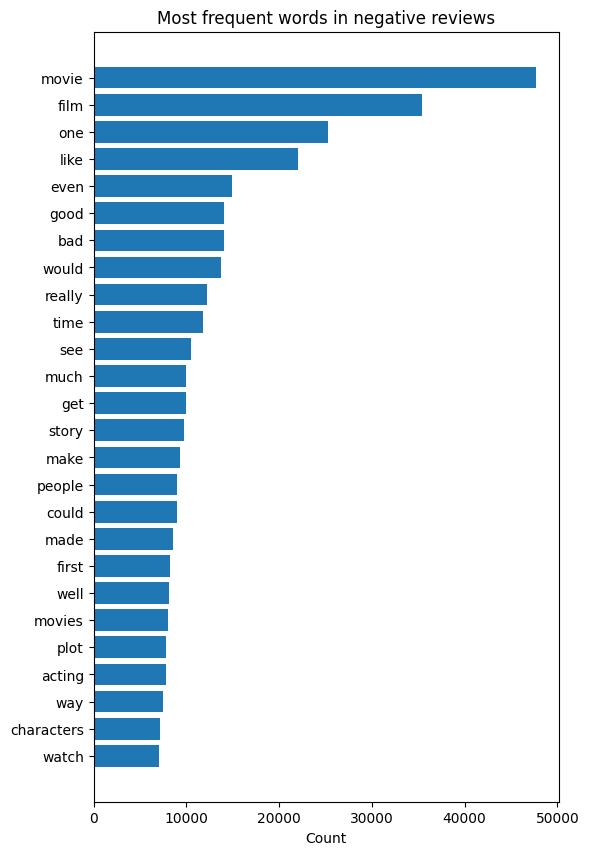

In [ ]:
plt.rcdefaults()
plt.figure(figsize=(6,10), dpi=100)
plt.barh(np.arange(len(most_common_words_p)), most_common_words_occ_p, align='center')
plt.yticks(np.arange(len(most_common_words_p)), most_common_words_p)
plt.gca().invert_yaxis()
plt.xlabel("Count")
plt.title("Most frequent words in positive reviews")

plt.savefig("EDA_p.PNG")

plt.show()

plt.rcdefaults()
plt.figure(figsize=(6,10), dpi=100)
plt.barh(np.arange(len(most_common_words_n)), most_common_words_occ_n, align='center')
plt.yticks(np.arange(len(most_common_words_n)), most_common_words_n)
plt.gca().invert_yaxis()
plt.xlabel("Count")
plt.title("Most frequent words in negative reviews")

plt.savefig("EDA_n.PNG")
plt.show()

